# 15.Skl_SVM_rbf

SVM은 선형으로 분류가 되지 않는 모델에 대해서도 적용할 수 있는 장점이 있어서 실무에 많이 쓰인다.

커널 함수 중 가장 광범위하게 사용되는 것이 Radial Basic Function kernel (RBF 커널)이다. RBF커널과 관련된 식이 가우스 함수와 동일한 형태여서 가우시안 커널이라고도 불린다.

하이퍼 파라미터로 감마(최적화를 위한 자유 파라미터), 정규화와 관련된 C를 지정해 줘야 한다.
감마 값이 작으면 트레이닝 데이터를 잘 분류하면서도 테스트 데이터에 대해서도 훌륭한 결과를 보여주지만
감마 값이 커지면 트레이닝 데이터에는 매우 잘 맞아 떨어지지만 테스트 데이터에 대해서는 결과가 썩 만족스럽지 나오지 않는다.
따라서 결과가 오버피팅 될 수 있으며 감마의 크기는 오버피팅과 관련이 있다.
적절한 감마 값을 선택해서 오버피팅이나 언더피팅이 되지 않게 하는 것이 중요하다

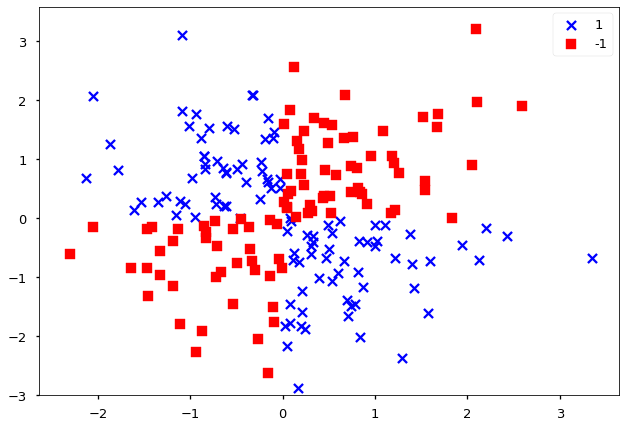

총 테스트 개수 : 60, 오류개수 : 6
정확도: 0.90


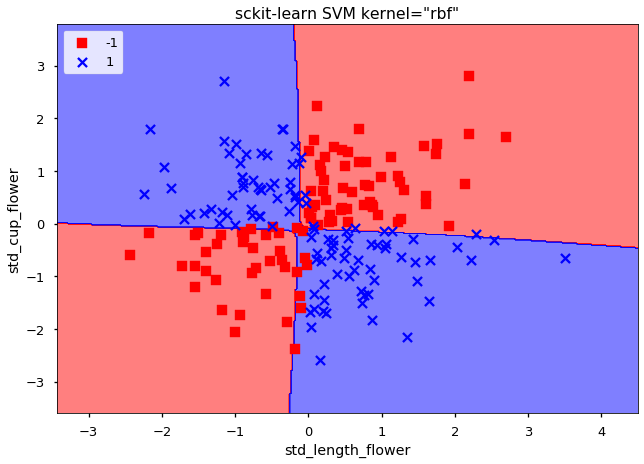

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from matplotlib import style
from plotdregion import plot_decision_region
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

style.use('seaborn-talk')

if __name__ == '__main__':
    #iris = datasets.load_iris()
    #X = iris.data[:,[2,3]]
    #y = iris.target
    
    # 여기 코드는 표준 정규분포로부터 200개의 샘플을 추출한 다음에
    # 추출한 샘플을 100개씩 두 개의 그룹으로 나누어, 두 그룹에 속하는 멤버들이
    # 0보다 큰지 아닌지에 대한 논리값을 순서대로 XOR 연산하여 나온 결과 중
    # True는 1로, False는 -1로 라벨링 한 뒤 좌표에 표시하는 코드이다.
    # 밑에 산점도를 보면 선형 분리가 안된 것들도 분류해 낼 수 있다
    X = np.random.randn(200,2)
    y = np.logical_xor(X[:,0]>0, X[:,1]>0)
    y = np.where(y,1,-1)

    plt.scatter(X[y==1, 0], X[y==1,1], color='b', marker='x', label='1')
    plt.scatter(X[y==-1, 0], X[y==-1,1], color='r', marker='s', label='-1')
    plt.ylim(-3.0)
    plt.legend()
    plt.show()
     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    #ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    #ml = LogisticRegression(C=1000.0, random_state=0)
    #ml = SVC(kernel='linear', C=1.0, random_state=0)
    
    ml = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=0)
    ml.fit(X_train_std, y_train)
    y_pred = ml.predict(X_test_std)
    print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != y_pred).sum()))
    print('정확도: %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, title='sckit-learn SVM kernel=\"rbf\"')